In [ ]:
# all the imports
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle
from PIL import Image, ImageFilter, ImageDraw
import os
from google.colab import drive 
from os import chdir as cd
import sys
import cv2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive'


 01-17-2020-21.59.04.pdf		   'Getting started.pdf'
'Alternative reservation'		    indi_ag.dta
 AML					   'Intro to research methodology'
'CDemandASH-APP151610935-Dhruv Sinha.pdf'  'LinearAlgQuiz2Solution (1).pdf'
 Classroom				   'LinearAlgQuiz2Solution (2).pdf'
'Colab Notebooks'			    LinearAlgQuiz2Solution.pdf
'Columbia SOP-UPDATED.gdoc'		   "Master's in Economics.gdoc"
 English				   'Meet Recordings'
 EnglishImg				   'MIT SES SOP.gdoc'
'Gender Bias'				    training_prepared_datasets


In [ ]:
path='/content/drive/My Drive/AML/'

Coverting original images onto original.pickle


In [ ]:
original_images = []
new_w = new_h = 128

i = 0
for img_path in glob.iglob(path+'lfw_demo/*/*.jpg'):
  print(i)
  if i==6000:
    break
  img = Image.open(img_path, mode='r')
  width, height = img.size
    
  left = (width - new_w)//2
  top = (height - new_h)//2
  right = (width + new_w)//2
  bottom = (height + new_h)//2
  #cropping image 
  #128*128*3
  img = img.crop((left, top, right, bottom))
    
  original_images.append(np.array(img))
    
  i += 1

original_images = np.array(original_images, dtype='float') / 255.0
#print(original_images)
#255 is normalization. In this step, converting list to numpy array. 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


21


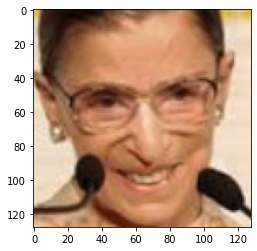

In [ ]:
print(len(original_images))
plt.imshow(original_images[0])

In [ ]:
path_save='/content/drive/My Drive/AML/saved_numpy_arrays/'
np.save(path_save+'original_demo', original_images)


In [ ]:
part1 = original_images[:int(1/6*(len(original_images)))]
part2 = original_images[int(1/6*(len(original_images))):int(2/6*(len(original_images)))]
part3 = original_images[int(2/6*(len(original_images))):int(3/6*(len(original_images)))]
part4 = original_images[int(3/6*(len(original_images))):int(4/6*(len(original_images)))]
part5 = original_images[int(4/6*(len(original_images))):int(5/6*(len(original_images)))]
part6 = original_images[int(5/6*(len(original_images))):]
#dividing orignal list into 6 parts. 

In [ ]:
print (len(part5))

3


In [ ]:
with open(path+'lfw_demo/original_demo.pickle', 'wb') as f:#wb: write bytes
    pickle.dump(original_images, f)


Adding Speckle noise 


In [ ]:
noisy_images = []
new_w=128
new_h=128
i=0
def speckle(image):
  row,col,ch = image.shape
  gauss = np.random.randn(row,col,ch)
  gauss = gauss.reshape(row,col,ch)        
  noisy = image + image * gauss*4
  return noisy

for img_path in glob.iglob('/content/drive/My Drive/AML/lfw_demo/*/*.jpg'):
  print (i)
  if i==6000:
    break
  # Opening the image
  img = Image.open(img_path)#this is the object image and not in numpy form. Therefore, cant use shape
    
  #we are cropping the image equally from all the sides so that only face is visible
  width, height = img.size
  left = (width - new_w)//2
  top = (height - new_h)//2
  right = (width + new_w)//2
  bottom = (height + new_h)//2
  img = img.crop((left, top, right, bottom))
    
  img=np.array(img)#converting the image from image object to numpy array. We want to pass it to the speckle function. 
  noisy_img=speckle(img)
  del img 
  #adding the speckled image to a list
  noisy_images.append(np.array(noisy_img))
  i+=1

#converting the noisy_images list to a numpy array. dividing each cell by 255 for normalization. This is a special feature of numpy arra
noisy_images = np.array(noisy_images, dtype='float') / 255.0 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


21


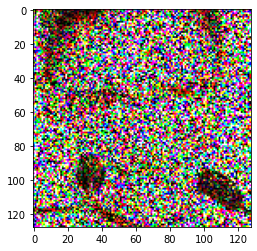

In [ ]:
print(len(noisy_images))
plt.imshow(noisy_images[0])

In [ ]:
path_save='/content/drive/My Drive/AML/saved_numpy_arrays/'
np.save(path_save+'four_noisy_demo', noisy_images)


Generating noisy.speckle from noisy numpy array


In [ ]:
with open(path+'lfw_demo/four_noisy_demo.pickle', 'wb') as f:#wb: write bytes
    pickle.dump(noisy_images, f)